[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/MGP/blob/main/GP/mcda.ipynb)


## Conjunto de dados

Trabalharemos inicialmente com um conjunto de dados do Legathum Prosperity Index que avalia países com base em 12 indicadores socioeconômicos. 


In [1]:
import pandas as pd # biblioteca utilizada para a leitura de dados
import numpy as np # biblioteca para trabalhar com matrizes e operações de Álgebra Linear em Python

In [3]:
# A matriz de dados está disponível no link do github abaixo. 
# Assim, a leitura dos dados pode ser realizada de maneira direta através do link

url = 'https://raw.githubusercontent.com/diogoflim/ProjIntegrador_PO_IA/main/Dados/LegathumProsperityIndex.csv'
df = pd.read_csv(url, index_col=0, sep = ';')

In [4]:
# Visualização inicial da tabela
df

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
Alternativa,,,,,,,,,,,,
Afghanistan,33.79,27.58,42.91,31.18,50.98,25.37,30.07,38.92,40.48,41.21,19.71,22.32
Albania,41.81,70.91,56.71,47.94,73.84,60.95,52.37,73.94,58.27,59.78,73.09,44.92
Algeria,37.83,61.87,44.44,39.64,72.47,48.77,37.95,76.62,44.89,39.56,75.23,47.04
Angola,31.44,27.70,33.34,33.81,50.29,31.62,22.79,42.35,50.50,40.18,61.39,44.11
Argentina,36.14,71.40,46.95,55.93,77.19,54.35,53.46,80.64,58.57,77.57,70.43,51.26
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,27.48,61.67,19.88,12.41,70.48,38.96,27.89,68.82,57.61,40.63,41.40,44.20
Vietnam,58.06,66.64,54.55,44.33,76.48,62.96,44.92,71.84,52.71,40.10,67.71,63.94
Yemen,26.05,28.72,34.39,17.41,57.02,28.35,27.49,44.57,45.34,22.95,26.48,41.20


In [8]:
# O método describe da biblioteca pandas pode ser usado para realizarmos uma descriç~]ao inicial dos dados da tabela 
df.describe()

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,49.728084,58.935509,55.017365,50.576587,68.850479,54.259641,53.245928,68.934910,55.570299,57.493293,67.208982,52.722455
std,13.283210,19.396275,14.080335,19.024834,11.156941,18.378276,15.506687,19.877394,8.825607,18.229007,17.520125,9.021113
min,22.680000,15.300000,19.880000,12.410000,32.810000,18.270000,22.510000,21.120000,33.670000,19.290000,16.000000,22.320000
25%,39.610000,44.225000,45.965000,37.720000,60.240000,37.315000,40.240000,53.300000,49.840000,42.400000,58.730000,47.280000
50%,48.030000,61.870000,54.390000,46.160000,72.330000,56.820000,52.340000,74.450000,55.030000,57.880000,68.550000,51.930000
75%,59.940000,74.175000,64.600000,61.565000,77.090000,70.560000,63.915000,85.580000,60.380000,69.820000,80.330000,57.275000
max,79.270000,91.270000,87.480000,91.040000,86.630000,87.960000,86.430000,96.180000,77.980000,94.090000,95.750000,77.240000


array([[<AxesSubplot:title={'center':'Economic Quality'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Enterprise Conditions'}>],
       [<AxesSubplot:title={'center':'Governance'}>,
        <AxesSubplot:title={'center':'Health'}>,
        <AxesSubplot:title={'center':'Infrastructure and Market Access'}>],
       [<AxesSubplot:title={'center':'Investment Environment'}>,
        <AxesSubplot:title={'center':'Living Conditions'}>,
        <AxesSubplot:title={'center':'Natural Environment'}>],
       [<AxesSubplot:title={'center':'Personal Freedom'}>,
        <AxesSubplot:title={'center':'Safety and Security'}>,
        <AxesSubplot:title={'center':'Social Capital'}>]], dtype=object)

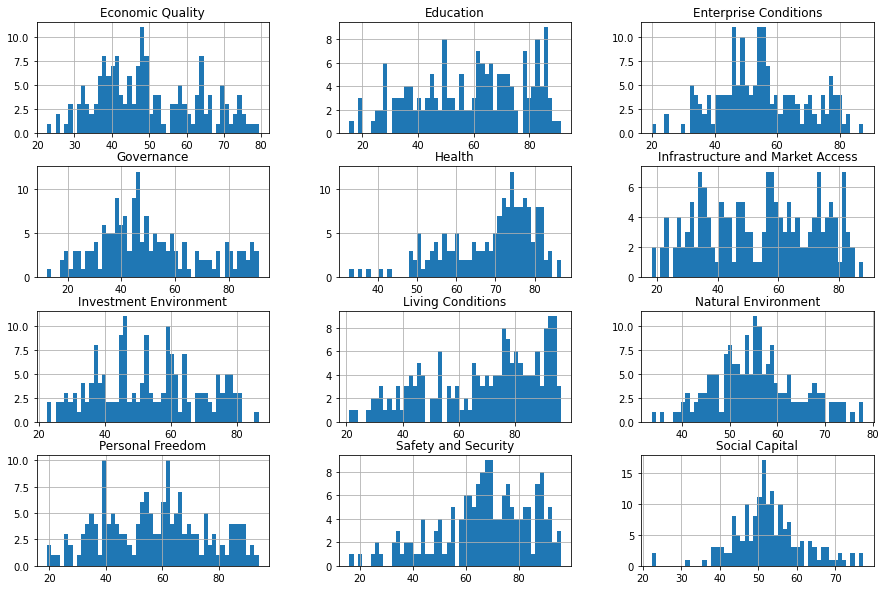

In [15]:
# Além disso, podemos plotar a distribuição dos dados para cada um dos critérios. Vejamos abaixo.

df.hist(bins=50, figsize=(15, 10))

Para o uso da biblioteca PyDecision, passaremos a matriz de decisão para o formato de array do numpy.

Isso pode ser realizado de maneira simples, conforme ilustrado abaixo

In [16]:
X = np.array(df)
X

array([[33.79, 27.58, 42.91, ..., 41.21, 19.71, 22.32],
       [41.81, 70.91, 56.71, ..., 59.78, 73.09, 44.92],
       [37.83, 61.87, 44.44, ..., 39.56, 75.23, 47.04],
       ...,
       [26.05, 28.72, 34.39, ..., 22.95, 26.48, 41.2 ],
       [29.4 , 40.7 , 51.58, ..., 48.79, 66.36, 51.73],
       [35.83, 52.28, 36.63, ..., 39.35, 61.41, 45.62]])

In [17]:
m, n = X.shape

print(f'O número de alternativas é: {m}\nO número de critérios é: {n}')

O número de alternativas é: 167
O número de critérios é: 12


# Decisão Multicritério

A literatura de decisão multicritério apresenta uma vasta quantidade de métodos para a resolução de problemas de decisão que envolvem múltiplos objetivos, muitas vezes conflitantes.

A Biblioteca PyDecision (https://github.com/Valdecy/pyDecision) inclui diversos métodos em Python. 

In [147]:
# No Google Colab
!pip install pyDecision

^C


In [19]:
from pyDecision.algorithm import promethee_ii

## PROMETHEE II

Inicialmente, aplicaremos os métodos PROMETHEE I e PROMETHEE II são usados para ordenar alternativas em problemas de análise multicritério.

Como visto na aula, os parâmetros do PROMETHEE II incluem:

- O tipo de função de preferências de cada critério;
- Limiares de indiferença, preferência e veto para cada critério;
- Pesos dos critérios;
- Parâmetro $s$, caso a função de preferência s-curve seja escolhida para algum critério.

In [20]:
# Parâmetros
Q = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5] # Limiares de indiferença
P = [20 for j in range(n)] # Limiares de preferência
W = [1/n for j in range(n)] # pesos
S = [0 for j in range(n)] # s (caso use o critério Gaussiano)
F = ['t5' for j in range(n)] # 't1' = Usual; 't2' = U-Shape; 't3' = V-Shape; 't4' = Level; 't5' = V-Shape with Indifference; 't6' = Gaussian; 't7' = C-Form


In [21]:
P

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]

Vamos aplicar o PROMETHEE e armazenar os fluxos líquidos em p2.

Imprimiremos na tela os resultados das 20 primeiras alternativas 

In [29]:
resultados = promethee_ii(X, W = W, Q = Q, S = S, P = P, F = F, sort = False, topn = 20)

a1: -0.689
a2: 0.05
a3: -0.189
a4: -0.565
a5: 0.097
a6: 0.134
a7: 0.652
a8: 0.68
a9: -0.034
a10: 0.132
a11: -0.345
a12: 0.078
a13: 0.562
a14: -0.096
a15: -0.296
a16: -0.189
a17: 0.003
a18: -0.035
a19: 0.063
a20: 0.251


Podemos acessar os fluxos líquidos das alternativas e incluí-los em um DataFrame!

In [33]:
ranking = pd.DataFrame(resultados[:,1], columns = ['Fluxo Líquido'], index = df.index)
ranking.sort_values("Fluxo Líquido", ascending=False, inplace=False)

,Fluxo Líquido
Alternativa,
Denmark,0.752251
Norway,0.749159
Sweden,0.747540
Finland,0.742711
Switzerland,0.734687
...,...
Chad,-0.680064
Afghanistan,-0.689253
Central African Republic,-0.690715


Vejamos as 10 melhores alternativas!

In [34]:
ranking.iloc[:10]

,Fluxo Líquido
Alternativa,
Afghanistan,-0.689253
Albania,0.049521
Algeria,-0.189376
Angola,-0.564746
Argentina,0.097370
Armenia,0.133809
Australia,0.651979
Austria,0.680414
Azerbaijan,-0.034073


Quais são as 10 piores?

In [36]:
ranking.iloc[-10:]

,Fluxo Líquido
Alternativa,
United Arab Emirates,0.319845
United Kingdom,0.659149
United States,0.598961
Uruguay,0.351058
Uzbekistan,-0.125169
Venezuela,-0.441557
Vietnam,0.035138
Yemen,-0.699471
Zambia,-0.312966


## Exercício 1

Considere o problema de decisão da ordenação de países com base nos dados do Legatum Institute. 

Ao invés de utilizar a função V-shape (tipo 5) para todos os critérios, poderíamos usar funções diferentes para critérios distintos. 

Além disso, poderíamos usar valores distintos para os limiares de preferência e indiferença!

Faça o seguinte teste:

- Para os oito primeiros critérios, utilize a função de preferência critério usual (tipo 1)
- Para os critérios $g_9$ e $g_{10}$, use a função do tipo 2, com parâmetros: $q_9 = 7$ e $q_{10} = 6$.
- Para os critérios $g_{11}$ e $g_{12}$, use a função do tipo 5, com os parâmetros a seguir: $q_{11} = q_{12} = 10$ $q_{11} = q_{12} = 20$

O ranking se alterou? Dentre as 10 primeiras alternativas, quantas permaneceram?

## Exercício 2: Ordenação de Fornecedores

Uma organização deseja ordenar suas alternativas de fornecedores para a realização de uma certa atividade. Para isso, seis critérios foram selecionados e as avaliações dos fornecedores é dada na tabela abaixo.

| Fornecedores | Preço         | Qualidade | Confiabilidade | Credibilidade | Assistência | Lead time |
|--------------|---------------|-----------|-----------------|---------------|-------------|-----------|
| Fornecedor 1 | 1.834.600,20  | 1         | 18              | 90            | 1           | 30        |
| Fornecedor 2 | 1.823.240,00  | 2         | 5               | 100           | 0           | 30        |
| Fornecedor 3 | 1.902.311,00  | 3         | 10              | 80            | 1           | 30        |
| Fornecedor 4 | 1.795.200,00  | 1         | 9               | 95            | 0           | 30        |
| Fornecedor 5 | 1.712.000,50  | 2         | 1               | 100           | 0           | 35        |
| Fornecedor 6 | 1.697.890,25  | 3         | 16              | 90            | 1           | 45        |
| Fornecedor 7 | 1.722.765,33  | 2         | 4               | 85            | 1           | 40        |

Fonte: [artigo_sbpo](https://proceedings.science/sbpo/sbpo-2022/trabalhos/uso-do-metodo-fitradeoff-para-selecao-de-fornecedores-em-um-processo-licitatorio?lang=pt-br)

Aplique o método PROMETHEE II para ordenar as alternativas.

Observação: Perceba que para os critérios "preço" e "lead time" valores mais altos são piores. Assim, multiplique essas colunas por -1 antes de aplicar o método.

In [45]:
data = {
    'Fornecedores': ['Fornecedor 1', 'Fornecedor 2', 'Fornecedor 3', 'Fornecedor 4', 'Fornecedor 5', 'Fornecedor 6', 'Fornecedor 7'],
    'Preço': [-1834600.20, -1823240.00, -1902311.00, -1795200.00, -1712000.50, -1697890.25, -1722765.33],
    'Qualidade': [1, 2, 3, 1, 2, 3, 2],
    'Confiabilidade': [18, 5, 10, 9, 1, 16, 4],
    'Credibilidade': [90, 100, 80, 95, 100, 90, 85],
    'Assistência': [1, 0, 1, 0, 0, 1, 1],
    'Lead time': [-30, -30, -30, -30, -35, -45, -40]
}

df = pd.DataFrame(data).set_index("Fornecedores")
df

,Preço,Qualidade,Confiabilidade,Credibilidade,Assistência,Lead time
Fornecedores,,,,,,
Fornecedor 1,-1834600.20,1,18,90,1,-30
Fornecedor 2,-1823240.00,2,5,100,0,-30
Fornecedor 3,-1902311.00,3,10,80,1,-30
Fornecedor 4,-1795200.00,1,9,95,0,-30
Fornecedor 5,-1712000.50,2,1,100,0,-35
Fornecedor 6,-1697890.25,3,16,90,1,-45
Fornecedor 7,-1722765.33,2,4,85,1,-40


1. Inicialmente, escolha a função do tipo 1 para todos os critérios e utilize pesos iguais.



2. Em seguida, no critério confiabilidade, selecione a função do tipo 5 usando os parâmetros $q_3 = 3$ e $p_3 = 5$.


3. Realize variações nos parâmetros para realizar testes adicionais. Por exemplo, para um decisor que prioriza o lead time (cosidera esse critério com peso mais alto que os demais), o resultado seria alterado?
